In [1]:
# !pip install descartes

In [2]:
# conda install geopandas

In [3]:
# conda install bokeh

In [4]:
# !pip install shapely

In [83]:
import geopandas as gpd

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point, Polygon

In [85]:
df = pd.read_csv('nyc_birds.csv')

In [86]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699064 entries, 0 to 1699063
Data columns (total 15 columns):
GLOBAL UNIQUE IDENTIFIER    object
CATEGORY                    object
COMMON NAME                 object
OBSERVATION_COUNT           int64
LATITUDE                    float64
LONGITUDE                   float64
OBSERVATION_DATE            object
MONTH                       int64
YEAR                        int64
OBSERVER ID                 object
DURATION MINUTES            float64
NUMBER OBSERVERS            float64
TRIP COMMENTS               object
SPECIES COMMENTS            object
APPROVED                    int64
dtypes: float64(4), int64(4), object(7)
memory usage: 194.4+ MB


In [88]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


# Plotting Sighting locations using GeoPandas

**IMPORT SHAPE FILE OF NYC**

In [89]:
nyc_shp = gpd.read_file('manhattan_shapefile_from_qgis.shp')
nyc_shp.head()

,countyfp10,vtdst10,geoid10,vtdi10,name10,namelsad10,lsad10,mtfcc10,funcstat10,aland10,...,uss_2_10,uss_6_10,av,ndv,nrv,cartodb_id,created_at,updated_at,comp_dvote,geometry
0,061,97,3606197,P,6400097,Voting District 6400097,V1,G5240,S,27830.0,...,0.806250,0.807453,0.781536,137.550369,38.449635,687,2015-03-17,2015-03-17,105.0,"POLYGON ((-74.00684 40.70786, -74.00764 40.708..."
1,061,797,36061797,P,7100036,Voting District 7100036,V1,G5240,S,21764.0,...,0.968000,0.984556,0.977652,281.563751,6.436255,811,2015-03-17,2015-03-17,234.0,"POLYGON ((-73.94066 40.83473, -73.94351 40.835..."
2,061,156,36061156,P,6500059,Voting District 6500059,V1,G5240,S,17502.0,...,0.696774,0.689873,0.673389,124.577057,60.422943,961,2015-03-17,2015-03-17,81.0,"POLYGON ((-73.94901 40.77334, -73.95126 40.774..."
3,061,1176,360611176,P,7500014,Voting District 7500014,V1,G5240,S,87002.0,...,0.826291,0.829493,0.809526,406.382202,95.617783,1038,2015-03-17,2015-03-17,294.0,"POLYGON ((-73.99180 40.73850, -73.99222 40.737..."
4,061,557,36061557,P,6900006,Voting District 6900006,V1,G5240,S,10898.0,...,0.867021,0.878173,0.835146,200.434982,39.565014,113,2015-03-17,2015-03-17,136.0,"POLYGON ((-73.97361 40.78961, -73.97406 40.788..."


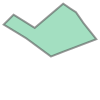

In [90]:
#test out map shape

nyc_shp.iloc[0]['geometry']

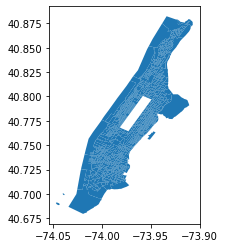

In [91]:
%matplotlib inline

fig,ax = plt.subplots()

nyc_shp.plot(ax=ax)

**Convert Dataframe to coordinate reference system (CRS) FORMAT** 

In [92]:
#instantiate the crs. Here, the epsg code refers to Lat/Long
#https://geopandas.org/projections.html

crs = {'init', 'epsg:4326'}
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [93]:
"""CREATE POINTS"""

geometry = [Point(xy) for xy in zip( df['LONGITUDE'], df['LATITUDE'])]

In [94]:
#review a single entry
geometry[:3]

In [95]:
geo_df = gpd.GeoDataFrame(df,
                         crs=crs, 
                         geometry=geometry)

In [96]:
geo_df.sample(30)

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED,geometry
1687755,URN:CornellLabOfOrnithology:EBIRD:OBS881551062,species,Great Black-backed Gull,2,40.874009,-73.918705,2020-03-21,3,2020,obsr1500488,225.0,1.0,NaN,2 were fighting with each other over the Hudso...,1,POINT (-73.91871 40.87401)
713833,URN:CornellLabOfOrnithology:EBIRD:OBS362706922,species,Great Horned Owl,1,40.771548,-73.972482,2016-01-01,1,2016,obsr333755,180.0,15.0,<br />Submitted from eBird Android 1.0.1,continuing bird,1,POINT (-73.97248 40.77155)
170593,URN:CornellLabOfOrnithology:EBIRD:OBS119050950,species,Canada Goose,1,40.777116,-73.969574,2011-05-20,5,2011,obsr189916,95.0,1.0,"Steve Q & gp (at SF), Alice, Willa & Mom (appl...",NaN,1,POINT (-73.96957 40.77712)
581393,URN:CornellLabOfOrnithology:EBIRD:OBS313998899,species,Black-and-white Warbler,5,40.777116,-73.969574,2015-04-29,4,2015,obsr16646,90.0,1.0,"<br />Submitted from BirdLog NA for iOS, versi...",NaN,1,POINT (-73.96957 40.77712)
1237543,URN:CornellLabOfOrnithology:EBIRD:OBS618412573,species,Wilson's Warbler,1,40.771548,-73.972482,2018-05-15,5,2018,obsr798796,76.0,1.0,NaN,NaN,1,POINT (-73.97248 40.77155)
405101,URN:CornellLabOfOrnithology:EBIRD:OBS219619334,species,Bufflehead,9,40.786003,-73.961960,2013-12-01,12,2013,obsr257606,90.0,1.0,NaN,NaN,1,POINT (-73.96196 40.78600)
422982,URN:CornellLabOfOrnithology:EBIRD:OBS239698292,species,American Woodcock,2,40.771548,-73.972482,2014-03-14,3,2014,obsr352849,120.0,1.0,"Pinetum, Reservoir, and Ramble. Cool and sunny...",Separate locations in the ramble. Thanks to pe...,1,POINT (-73.97248 40.77155)
43562,URN:CornellLabOfOrnithology:EBIRD:OBS25678276,species,Northern Flicker,3,40.771548,-73.972482,2005-04-22,4,2005,obsr44102,150.0,1.0,NaN,NaN,1,POINT (-73.97248 40.77155)
312228,URN:CornellLabOfOrnithology:EBIRD:OBS194861761,species,Mallard,5,40.754457,-73.964486,2013-03-03,3,2013,obsr24607,10.0,3.0,NaN,NaN,1,POINT (-73.96449 40.75446)
1301591,URN:CornellLabOfOrnithology:EBIRD:OBS664958792,species,Northern Mockingbird,1,40.688537,-74.018976,2018-10-08,10,2018,obsr849694,140.0,1.0,NaN,NaN,1,POINT (-74.01898 40.68854)


In [97]:
geo_df.dtypes

GLOBAL UNIQUE IDENTIFIER      object
CATEGORY                      object
COMMON NAME                   object
OBSERVATION_COUNT              int64
LATITUDE                     float64
LONGITUDE                    float64
OBSERVATION_DATE              object
MONTH                          int64
YEAR                           int64
OBSERVER ID                   object
DURATION MINUTES             float64
NUMBER OBSERVERS             float64
TRIP COMMENTS                 object
SPECIES COMMENTS              object
APPROVED                       int64
geometry                    geometry
dtype: object

In [98]:
# geo_df.drop(['LATITUDE', 'LONGITUDE'], axis = 1) 

In [99]:
# cardinal = geo_df[geo_df['COMMON NAME'] =='Northern Cardinal']

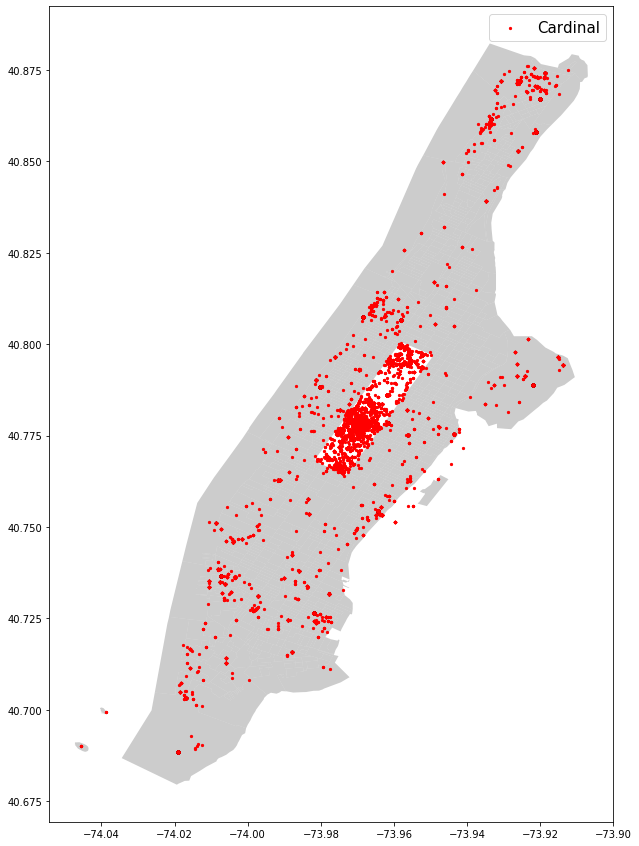

In [104]:
fig, ax = plt.subplots(figsize = (15,15))

nyc_shp.plot(ax=ax, alpha = 0.4, color = 'grey')

# geo_df.plot(ax=ax)
# ax.set_axis_off()

geo_df[geo_df['COMMON NAME'] =='Northern Cardinal'].plot(ax=ax, markersize = 5, color = 'red', marker = 'o', label = 'Cardinal')
# geo_df[geo_df['COMMON NAME'] == 'Blue Jay'].plot(ax=ax, markersize=5, color = 'blue', marker = 'o', label ='Bluejay')

plt.legend(prop={'size':15})
# plt.show()